# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

**Step 1:** Load the dataset _(written for you)_.

In [2]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [7]:
seeds_df.sample(n=10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
67,14.01,14.29,0.8625,5.609,3.158,2.217,5.132
122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971
37,17.08,15.38,0.9079,5.832,3.683,2.956,5.484
153,11.18,13.04,0.8266,5.220,2.693,3.332,5.001
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109
73,19.11,16.26,0.9081,6.154,3.930,2.936,6.079
49,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
181,12.46,13.41,0.8706,5.236,3.017,4.987,5.147
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [9]:
samples = seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [10]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

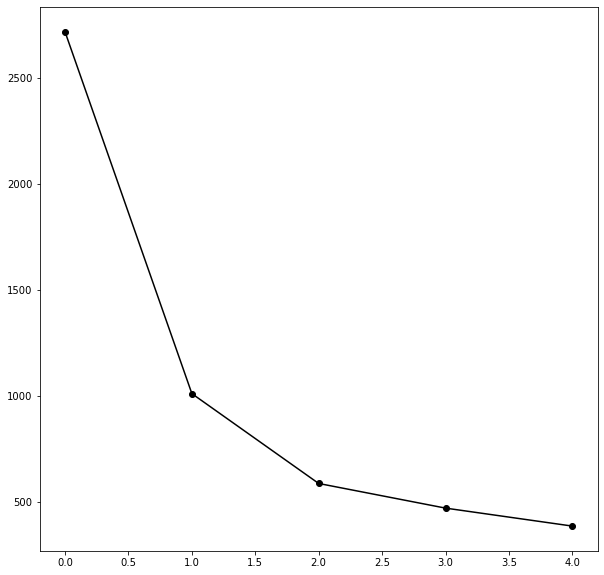

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(inertias,'o',linestyle = '-',color='black')
plt.show()

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.